<a href="https://colab.research.google.com/github/liachicue/Linear_Classifier_Models/blob/main/Generativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Generativo - Gaussiano


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.utils.validation import check_random_state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pd_speech_features.csv to pd_speech_features.csv


In [ ]:
dfStars = pd.read_csv('Stars.csv')
dfPD = pd.read_csv('pd_speech_features.csv')

### Parkinson

In [ ]:
X =dfPD.drop(columns=['class']) # X sera nuestras características
Y = dfPD['class'] # Etiqueta 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, :-1].values)
X = imputer.transform(X.iloc[:, :-1].values)

In [ ]:
# Dividimos el conjunto de datos en Entrenamiento y Test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3 ,random_state = 123)

In [ ]:
# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
model_LR = LogisticRegression(penalty = 'l2', C=10, max_iter=700)#q=1, valor absoluto. q=2, (norm cuadratica)
                                                                 #Mirar la grabacion, min de convergencia autorizado y pasa por ahi
                                                                 #Ojo con el penalty saga (cuando l1 c =0.0001)
model_LR.fit(Xtrain, ytrain)


yEst = model_LR.predict(Xtest)

In [ ]:
print('ACC', accuracy_score(ytest,yEst)*100.)
cmat = confusion_matrix(ytest,yEst)
ax = ConfusionMatrixDisplay(cmat,display_labels=['Negative','Positive'])
ax.plot()
plt.show()

### Para estrellas


In [ ]:
 #Toca pasarlas a números
 dfStars['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [ ]:
dfStars["Color"] = dfStars["Color"].astype('category').cat.codes
dfStars["Spectral_Class"] = dfStars["Spectral_Class"].astype('category').cat.codes #Se esta tratando como una categoria
dfStars.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color                int8
Spectral_Class       int8
Type                int64
dtype: object

In [ ]:
X = dfStars.drop(columns=['Type'])
y = dfStars['Type']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, :-1].values.astype('float64'))
X = imputer.transform(X.iloc[:, :-1].values.astype('float64'))
X = X[:,:2]

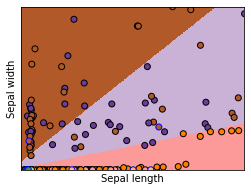

ACC 50.0


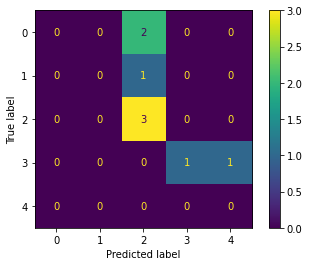

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.03, random_state = 123)

model_LR = LogisticRegression(penalty='l2',C = 10,max_iter=2000,solver='lbfgs')
model_LR.fit(Xtrain,ytrain)

yEst = model_LR.predict(Xtest)


# Graficamos la superficie de decisión. Para ellos, asignaremos a cada color
# un punto en la malla [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # el .5 es para tener el espacio muestral fit
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


h = 120  # tamaño del paso en la malla o saltos
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #retorna matrices
Z = model_LR.predict(np.c_[xx.ravel(), yy.ravel()])# ravel vuelte matrices a vector
#predict predice a partir de los vectores 

# Se grafican los resultados en regioes de colores
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Se grafican también los datos de entrenamiento
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, edgecolors='b', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print('ACC', accuracy_score(ytest,yEst)*100.)
cmat = confusion_matrix(ytest,yEst)
ax = ConfusionMatrixDisplay(cmat,display_labels=dfStars['Type'].unique())
ax.plot()
plt.show()
